<a href="https://colab.research.google.com/github/Jayden-Nyamiaka/Machine-Learning-and-Data-Mining/blob/main/nyamiaka_jayden_set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://githubtocolab.com/emiletimothy/Caltech-CS155-2023/blob/main/set2/set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the text files in.

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training1.txt', 'wine_training1.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training2.txt', 'wine_training2.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_validation.txt', 'wine_validation.txt')

('wine_validation.txt', <http.client.HTTPMessage at 0x7fe4f224c670>)

The following function may be useful for loading the necessary data.

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

The following function should be used to prepare the input data.

In [ ]:
'''
Prepares the given input data by normalizing each feature column 
and adding the bias term (another column added at i = 0 of all 1's).

Inputs: 
    Xinput: A (N, D) numpy matrix of the training data X taken directly from the file.
    Xtest: A (M, D) numpy matrix of the validation data X taken directly from the file.


Outputs:
    A (N, D + 1) matrix of the prepared training X data.
    A (M, D + 1) matrix of the prepared testing X data.
'''
def prepare_input_X(Xinput, Xtest):
  test = np.zeros_like(Xtest)
  for col_idx in range(np.shape(Xinput)[1]):
    column = Xinput[:, col_idx]
    Xmean, Xstd = np.mean(column), np.std(column)
    Xinput[:, col_idx] = (column - Xmean) / Xstd
    test[:, col_idx] = (Xtest[:, col_idx] - Xmean) / Xstd
  Xinput_new = np.append(np.ones((np.shape(Xinput)[0], 1)), Xinput, 1)
  Xtest_new = np.append(np.ones((np.shape(test)[0], 1)), test, 1)

  return Xinput_new, Xtest_new

In [ ]:
test_data = load_data('wine_validation.txt')
ytest = test_data[:, 0]
Xtest = test_data[:, 1:]

train_data_1 = load_data('wine_training1.txt')
ybig = train_data_1[:, 0]
Xbig, Xbig_test = prepare_input_X(train_data_1[:, 1:], Xtest)

train_data_2 = load_data('wine_training2.txt')
ysmall = train_data_2[:, 0]
Xsmall, Xsmall_test = prepare_input_X(train_data_2[:, 1:], Xtest)

In [ ]:
'''
Calculate the log loss of a model.

Inputs:
    X: A (N, D) numpy array containing the data points.
    Y: A (N, ) numpy array containing the (float) labels of the data points.
    w: A (D, ) numpy array containing the weight vector.

Outputs:
    The log loss evaluated with respect to X, Y, and w.
'''
def avg_log_loss(X, Y, w):
  return np.average(np.log(1. + np.exp(-Y * X.dot(w))))

'''
Calculates the l2 norm of a weight vector.

Inputs:
    w: A (D, ) numpy array of the weight vector

Outputs:
    The l2 norm evaulated for vector w.
'''
def l2_norm(w):
  return np.sqrt(w.dot(w))

'''
Calculate the gradient of the l2 logistic regression learning objective
evaluated at a single point (x, y) and weight vector w.

Inputs:
    x: A (D, ) shaped numpy array containing a single data point.
    y: The float label for the data point.
    w: A (D, ) shaped numpy array containing the weight vector.
    penalty: A value for the regularization penalty parameter λ.
    N: The number of points in the data set (x, y).
    
Output:
    The gradient of the loss with respect to w. 
'''
def l2_logistic_gradient(x, y, w, penalty, N):
  return - y * x / (1. + np.exp(y * w.dot(x))) + (2. * penalty / N) * w


'''
Perform SGD using a training dataset (Xtrain, Ytrain), a validation 
dataset (Xtest, Ytest), learning rate eta, and N_epochs epochs.

Note: Sets the starting weights to small random numbers.

Inputs:
    Xtrain: A (N, D) numpy array containing the training data points.
    Ytrain: A (N, ) numpy array containing the classification labels [1, -1] of the training data points.
    Xtest: A (M, D) numpy array containing the test data points.
    Ytest: A (M, ) numpy array containing the classification labels [1, -1] of the test data points.
    eta: A value for the learning rate.
    penalty: A value for the regularization penalty parameter λ.
    N_epochs: The number of epochs (iterations) to run SGD.

    
Outputs:
    w: A (D, ) shaped numpy array of the resulting weight vector
    avg_training_error: The average log error of the training data
    avg_test_error: The average log error of the test data
    l2_norm: The l2 norm of the weight vector that defines the trained model
'''
def SGD(Xtrain, Ytrain, Xtest, Ytest, eta, penalty, N_epochs):
  N = Ytrain.size
  D = np.shape(Xtrain)[1]
  w = np.random.random_sample((D, )) / 100
  
  for n in range(N_epochs):
    random_order_indices = np.random.permutation([*range(N)])
    for i in random_order_indices:
      w -= eta * l2_logistic_gradient(Xtrain[i], Ytrain[i], w, penalty, N)
    
  avg_training_error = avg_log_loss(Xtrain, Ytrain, w)
  avg_test_error = avg_log_loss(Xtest, Ytest, w)
  return w, avg_training_error, avg_test_error, l2_norm(w)


'''
Plots X against Y tailored to the question.
'''
def plot_data(X, Y1, Y2, ylabel, title):
  plt.figure()
  plt.xscale("log")
  plt.plot(X, Y1, marker='.')
  plt.plot(X, Y2, marker='.')
  plt.legend(['Training Set 1', 'Training Set 2'], loc='best')
  plt.xlabel('Regularization Parameter (λ)')
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

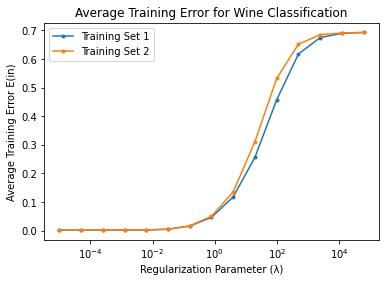

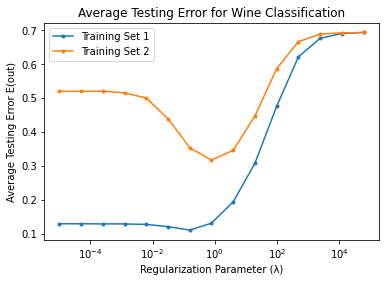

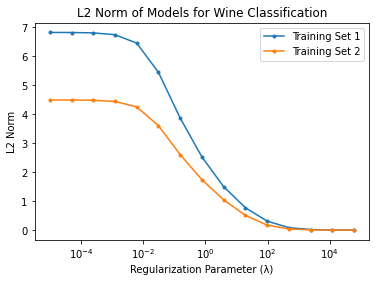

In [ ]:
epochs = 20000
eta = 5e-4
penalty_count = 15
lambda_penalties = np.full(penalty_count, 0.00001)

Wbig = []
Wsmall = []

big_avg_training_errors = np.zeros(penalty_count)
big_avg_test_errors = np.zeros(penalty_count)
big_l2_norms = np.zeros(penalty_count)

small_avg_training_errors = np.zeros(penalty_count)
small_avg_test_errors = np.zeros(penalty_count)
small_l2_norms = np.zeros(penalty_count)

for i in range(0, penalty_count):
  if (i != 0):
    lambda_penalties[i] = lambda_penalties[i - 1] * 5
  penalty = lambda_penalties[i]
  big_w, big_avg_training_errors[i], big_avg_test_errors[i], big_l2_norms[i] = SGD(Xbig, ybig, Xbig_test, ytest, eta, penalty, epochs)
  small_w, small_avg_training_errors[i], small_avg_test_errors[i], small_l2_norms[i] = SGD(Xsmall, ysmall, Xsmall_test, ytest, eta, penalty, epochs)
  Wbig.append(big_w)
  Wsmall.append(small_w)

plot_data(lambda_penalties, big_avg_training_errors, small_avg_training_errors, 'Average Training Error E(in)', 'Average Training Error for Wine Classification')
plot_data(lambda_penalties, big_avg_test_errors, small_avg_test_errors, 'Average Testing Error E(out)', 'Average Testing Error for Wine Classification')
plot_data(lambda_penalties, big_l2_norms, small_l2_norms, 'L2 Norm', 'L2 Norm of Models for Wine Classification')